In [478]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

In [517]:
## Specfify working directory & Dir of output file

LC_FOLDER_NAME = "Day5 Rep5"
SIMGA_FOLDER_NAME = "Day5 R5"
DIR_LC = "C:\\Users\\Owner\\OneDrive - UTS\Chapter 4\\Chapter 4 Experimental Data\\Light Curves (MC-PAM)\\" + LC_FOLDER_NAME
DIR_SIGMA = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Sigma(II)\\" + SIMGA_FOLDER_NAME
DIR_OUTPUT = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Organised Data\\"
os.chdir(DIR_LC)

## Import Files

In [518]:
## Import Light Curve Files
LIGHT_CURVE_FILES = {"Bottle1": "{}\\PB1.csv".format(DIR_LC),
              "Bottle2": "{}\\PB2.csv".format(DIR_LC),
               "Bottle3": "{}\\PB3.csv".format(DIR_LC),
               "Bottle4": "{}\\PB4.csv".format(DIR_LC),
               "Bottle6": "{}\\PB6.csv".format(DIR_LC),
               "Bottle7": "{}\\PB7.csv".format(DIR_LC),
               "Bottle8": "{}\\PB8.csv".format(DIR_LC),
               "Bottle9": "{}\\PB9.csv".format(DIR_LC),
               "Bottle10": "{}\\PB10.csv".format(DIR_LC),
              }

LC_DATA = list()
for i in range(11):
    try:
        if i != 0 and i != 5:
            data = pd.read_csv(LIGHT_CURVE_FILES["Bottle{}".format(i)], sep=";", encoding='cp1252')
            LC_DATA.append(data)
        else:
            pass
    except (pd.errors.ParserError, NameError) as e:
        data = pd.read_csv(LIGHT_CURVE_FILES["Bottle{}".format(i)], sep=",", encoding='cp1252')
        LC_DATA.append(data)

In [519]:
## Import Sigma Files
SIGMA_FILES = {"Bottle1": "{}\\PB1.csv".format(DIR_SIGMA),
              "Bottle2": "{}\\PB2.csv".format(DIR_SIGMA),
               "Bottle3": "{}\\PB3.csv".format(DIR_SIGMA),
               "Bottle4": "{}\\PB4.csv".format(DIR_SIGMA),
               "Bottle6": "{}\\PB6.csv".format(DIR_SIGMA),
               "Bottle7": "{}\\PB7.csv".format(DIR_SIGMA),
               "Bottle8": "{}\\PB8.csv".format(DIR_SIGMA),
               "Bottle9": "{}\\PB9.csv".format(DIR_SIGMA),
               "Bottle10": "{}\\PB10.csv".format(DIR_SIGMA),
              }

SIGMA_DATA = list()
for i in range(11):
    if i != 0 and i != 5:
        data = pd.read_csv(SIGMA_FILES["Bottle{}".format(i)], sep=";", encoding='cp1252')
        SIGMA_DATA.append(data)    

## Process Light Curve Data

In [520]:
## Bottle number conversion
# 1 = 0
# 2 = 1
# 3 = 2
# 4 = 3
# 6 = 4
# 7 = 5
# 8 = 6
# 9 = 7
# 10 = 8

#### White Light

In [521]:
with open(DIR_OUTPUT + "White_LC_Average_Parameters.csv", "a", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["PAR", "Y(II)", "Y(II)StDev", "Y(NPQ)", "Y(NPQ)StDev", "NPQ", "NPQStDev",
                    "qN", "qNStDev", "qP", "qPStDev", "qL", "qLStDev", "ETR", "ETRStDev"])
    for i in range(len(LC_DATA[0]["ETR"])):
        ## Calc & Append Averages
        PAR = (LC_DATA[0]["PAR"][i] + LC_DATA[1]["PAR"][i] + LC_DATA[2]["PAR"][i]) / 3
        YII = (LC_DATA[0]["Y(II)"][i] + LC_DATA[1]["Y(II)"][i] + LC_DATA[2]["Y(II)"][i]) / 3
        YNPQ = (LC_DATA[0]["Y(NPQ)"][i] + LC_DATA[1]["Y(NPQ)"][i] + LC_DATA[2]["Y(NPQ)"][i]) / 3
        NPQ = (LC_DATA[0]["NPQ"][i] + LC_DATA[1]["NPQ"][i] + LC_DATA[2]["NPQ"][i]) / 3
        QN = (LC_DATA[0]["qN"][i] + LC_DATA[1]["qN"][i] + LC_DATA[2]["qN"][i]) / 3
        QP = (LC_DATA[0]["qP"][i] + LC_DATA[1]["qP"][i] + LC_DATA[2]["qP"][i]) / 3
        QL = (LC_DATA[0]["qL"][i] + LC_DATA[1]["qL"][i] + LC_DATA[2]["qL"][i]) / 3
        ETR = (LC_DATA[0]["ETR"][i] + LC_DATA[1]["ETR"][i] + LC_DATA[2]["ETR"][i]) / 3

        ## Calc & Append StDev
        STDEV_YII = np.std([LC_DATA[0]["Y(II)"][i], LC_DATA[1]["Y(II)"][i], 
                                       LC_DATA[2]["Y(II)"][i]])
        STDEV_YNPQ = np.std([LC_DATA[0]["Y(NPQ)"][i], LC_DATA[1]["Y(NPQ)"][i], 
                                       LC_DATA[2]["Y(NPQ)"][i]])
        STDEV_NPQ = np.std([LC_DATA[0]["NPQ"][i], LC_DATA[1]["NPQ"][i], 
                                       LC_DATA[2]["NPQ"][i]])
        STDEV_QN = np.std([LC_DATA[0]["qN"][i], LC_DATA[1]["qN"][i], 
                                       LC_DATA[2]["qN"][i]])
        STDEV_QP = np.std([LC_DATA[0]["qP"][i], LC_DATA[1]["qP"][i], 
                                       LC_DATA[2]["qP"][i]])
        STDEV_QL = np.std([LC_DATA[0]["qL"][i], LC_DATA[1]["qL"][i], 
                                       LC_DATA[2]["qL"][i]])
        STDEV_ETR = np.std([LC_DATA[0]["ETR"][i], LC_DATA[1]["ETR"][i], 
                                       LC_DATA[2]["ETR"][i]])

        writer.writerow([PAR, YII, STDEV_YII, YNPQ, STDEV_YNPQ, NPQ, STDEV_NPQ, QN, STDEV_QN, 
                         QP, STDEV_QP, QL, STDEV_QL, ETR, STDEV_ETR])
f.close()

#### RGB Light

In [522]:
with open(DIR_OUTPUT + "RGB_LC_Average_Parameters.csv", "a", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["PAR", "Y(II)", "Y(II)StDev", "Y(NPQ)", "Y(NPQ)StDev", "NPQ", "NPQStDev",
                    "qN", "qNStDev", "qP", "qPStDev", "qL", "qLStDev", "ETR", "ETRStDev"])
    for i in range(len(LC_DATA[4]["ETR"])):
        ## Calc & Append Averages
        PAR = (LC_DATA[4]["PAR"][i] + LC_DATA[5]["PAR"][i] + LC_DATA[6]["PAR"][i]) / 3
        YII = (LC_DATA[4]["Y(II)"][i] + LC_DATA[5]["Y(II)"][i] + LC_DATA[6]["Y(II)"][i]) / 3
        YNPQ = (LC_DATA[4]["Y(NPQ)"][i] + LC_DATA[5]["Y(NPQ)"][i] + LC_DATA[6]["Y(NPQ)"][i]) / 3
        NPQ = (LC_DATA[4]["NPQ"][i] + LC_DATA[5]["NPQ"][i] + LC_DATA[6]["NPQ"][i]) / 3
        QN = (LC_DATA[4]["qN"][i] + LC_DATA[5]["qN"][i] + LC_DATA[6]["qN"][i]) / 3
        QP = (LC_DATA[4]["qP"][i] + LC_DATA[5]["qP"][i] + LC_DATA[6]["qP"][i]) / 3
        QL = (LC_DATA[4]["qL"][i] + LC_DATA[5]["qL"][i] + LC_DATA[6]["qL"][i]) / 3
        ETR = (LC_DATA[4]["ETR"][i] + LC_DATA[5]["ETR"][i] + LC_DATA[6]["ETR"][i]) / 3

        ## Calc & Append StDev
        STDEV_YII = np.std([LC_DATA[4]["Y(II)"][i], LC_DATA[5]["Y(II)"][i], 
                                       LC_DATA[6]["Y(II)"][i]])
        STDEV_YNPQ = np.std([LC_DATA[4]["Y(NPQ)"][i], LC_DATA[5]["Y(NPQ)"][i], 
                                       LC_DATA[6]["Y(NPQ)"][i]])
        STDEV_NPQ = np.std([LC_DATA[4]["NPQ"][i], LC_DATA[5]["NPQ"][i], 
                                       LC_DATA[6]["NPQ"][i]])
        STDEV_QN = np.std([LC_DATA[4]["qN"][i], LC_DATA[5]["qN"][i], 
                                       LC_DATA[6]["qN"][i]])
        STDEV_QP = np.std([LC_DATA[4]["qP"][i], LC_DATA[5]["qP"][i], 
                                       LC_DATA[6]["qP"][i]])
        STDEV_QL = np.std([LC_DATA[4]["qL"][i], LC_DATA[5]["qL"][i], 
                                       LC_DATA[6]["qL"][i]])
        STDEV_ETR = np.std([LC_DATA[4]["ETR"][i], LC_DATA[5]["ETR"][i], 
                                       LC_DATA[6]["ETR"][i]])

        writer.writerow([PAR, YII, STDEV_YII, YNPQ, STDEV_YNPQ, NPQ, STDEV_NPQ, QN, STDEV_QN, 
                         QP, STDEV_QP, QL, STDEV_QL, ETR, STDEV_ETR])
f.close()

#### RG Light

In [523]:
with open(DIR_OUTPUT + "RB_LC_Average_Parameters.csv", "a", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["PAR", "Y(II)", "Y(II)StDev", "Y(NPQ)", "Y(NPQ)StDev", "NPQ", "NPQStDev",
                    "qN", "qNStDev", "qP", "qPStDev", "qL", "qLStDev", "ETR", "ETRStDev"])
    for i in range(len(LC_DATA[3]["ETR"])):
        ## Calc & Append Averages
        PAR = (LC_DATA[3]["PAR"][i] + LC_DATA[7]["PAR"][i] + LC_DATA[8]["PAR"][i]) / 3
        YII = (LC_DATA[3]["Y(II)"][i] + LC_DATA[7]["Y(II)"][i] + LC_DATA[8]["Y(II)"][i]) / 3
        YNPQ = (LC_DATA[3]["Y(NPQ)"][i] + LC_DATA[7]["Y(NPQ)"][i] + LC_DATA[8]["Y(NPQ)"][i]) / 3
        NPQ = (LC_DATA[3]["NPQ"][i] + LC_DATA[7]["NPQ"][i] + LC_DATA[8]["NPQ"][i]) / 3
        QN = (LC_DATA[3]["qN"][i] + LC_DATA[7]["qN"][i] + LC_DATA[8]["qN"][i]) / 3
        QP = (LC_DATA[3]["qP"][i] + LC_DATA[7]["qP"][i] + LC_DATA[8]["qP"][i]) / 3
        QL = (LC_DATA[3]["qL"][i] + LC_DATA[7]["qL"][i] + LC_DATA[8]["qL"][i]) / 3
        ETR = (LC_DATA[3]["ETR"][i] + LC_DATA[7]["ETR"][i] + LC_DATA[8]["ETR"][i]) / 3

        ## Calc & Append StDev
        STDEV_YII = np.std([LC_DATA[3]["Y(II)"][i], LC_DATA[7]["Y(II)"][i], 
                                       LC_DATA[8]["Y(II)"][i]])
        STDEV_YNPQ = np.std([LC_DATA[3]["Y(NPQ)"][i], LC_DATA[7]["Y(NPQ)"][i], 
                                       LC_DATA[8]["Y(NPQ)"][i]])
        STDEV_NPQ = np.std([LC_DATA[3]["NPQ"][i], LC_DATA[7]["NPQ"][i], 
                                       LC_DATA[8]["NPQ"][i]])
        STDEV_QN = np.std([LC_DATA[3]["qN"][i], LC_DATA[7]["qN"][i], 
                                       LC_DATA[8]["qN"][i]])
        STDEV_QP = np.std([LC_DATA[3]["qP"][i], LC_DATA[7]["qP"][i], 
                                       LC_DATA[8]["qP"][i]])
        STDEV_QL = np.std([LC_DATA[3]["qL"][i], LC_DATA[7]["qL"][i], 
                                       LC_DATA[8]["qL"][i]])
        STDEV_ETR = np.std([LC_DATA[3]["ETR"][i], LC_DATA[7]["ETR"][i], 
                                       LC_DATA[8]["ETR"][i]])

        writer.writerow([PAR, YII, STDEV_YII, YNPQ, STDEV_YNPQ, NPQ, STDEV_NPQ, QN, STDEV_QN, 
                         QP, STDEV_QP, QL, STDEV_QL, ETR, STDEV_ETR])
f.close()

## Sigma Sort and Average

In [437]:
## Sort Sigma Values into Dictionary
WAVELENGTH_VALUES, SIGMA_VALUES ={},{}
for i in range(len(SIGMA_DATA)):
    WAVELENGTH_NM, SIGMA_NM = [], []
    for wavelength, sigma in zip(SIGMA_DATA[i]["Comment"][1:], SIGMA_DATA[i]["Sigma"][1:]):
        WAVELENGTH_NM.append(int(wavelength[:-2]))
        SIGMA_NM.append(float(sigma))
    WAVELENGTH_VALUES["Bottle{}".format(i)] = [WAVELENGTH_NM]
    SIGMA_VALUES["Bottle{}".format(i)] = [SIGMA_NM]

In [438]:
## Average & StDev Sigma
WHITE_SIGMA, WHITE_SIGMA_STDEV = [], []
for REP1 in SIGMA_VALUES["Bottle0"]:
    for REP2 in SIGMA_VALUES["Bottle1"]:
        for REP3 in SIGMA_VALUES["Bottle2"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                SIGMA_AV = (REP1[i] + REP2[i] + REP3[i]) / 3
                WHITE_SIGMA.append(round(SIGMA_AV, 3))
                SIGMA_STDEV = np.std([REP1[i], REP2[i], REP3[i]])
                WHITE_SIGMA_STDEV.append(round(SIGMA_STDEV, 3))

RGB_SIGMA, RGB_SIGMA_STDEV = [], []
for REP1 in SIGMA_VALUES["Bottle4"]:
    for REP2 in SIGMA_VALUES["Bottle5"]:
        for REP3 in SIGMA_VALUES["Bottle6"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                SIGMA_AV = (REP1[i] + REP2[i] + REP3[i]) / 3
                RGB_SIGMA.append(round(SIGMA_AV, 3))
                SIGMA_STDEV = np.std([REP1[i], REP2[i], REP3[i]])
                RGB_SIGMA_STDEV.append(round(SIGMA_STDEV, 3))
                
RB_SIGMA, RB_SIGMA_STDEV = [], []
for REP1 in SIGMA_VALUES["Bottle3"]:
    for REP2 in SIGMA_VALUES["Bottle7"]:
        for REP3 in SIGMA_VALUES["Bottle8"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                SIGMA_AV = (REP1[i] + REP2[i] + REP3[i]) / 3
                RB_SIGMA.append(round(SIGMA_AV, 3))
                SIGMA_STDEV = np.std([REP1[i], REP2[i], REP3[i]])
                RB_SIGMA_STDEV.append(round(SIGMA_STDEV, 3))


In [439]:
## Insert into CSV file
with open(DIR_OUTPUT + "Sigma_Averages.csv", "a", newline="") as f:
    writer = csv.writer(f)
    writer.writerow([SIMGA_FOLDER_NAME, "WhiteAv", "WhiteStDev",
                     "RGBAv", "RGBStDev", "RBAv", "RBStDev"])
    for i in range(len(WHITE_SIGMA)):
        writer.writerow(["", WHITE_SIGMA[i], WHITE_SIGMA_STDEV[i], RGB_SIGMA[i], 
                         RGB_SIGMA_STDEV[i], RB_SIGMA[i], RB_SIGMA_STDEV[i]])
f.close()  

## Calculate PAR(II) and ETR(II)

In [292]:
## Calculate PAR(II) and ETR(II)
PAR_II_VALUES = {}
ETR_II_VALUES = {}
for i in range(len(LC_DATA)):
    PARII_VALUES, ETRII_VALUES = [], []
    for x in range(len(LC_DATA[i]["ETR"])):
        PAR_II_CALC = float(SIGMA_DATA[i]["Sigma"][5])  * 0.6022 * LC_DATA[i]["PAR"][x] 
        ETR_II_CALC = PAR_II_CALC * (LC_DATA[i]["Y(II)"][x] / np.nanmax(LC_DATA[i]["Y(II)"]))
        PARII_VALUES.append(PAR_II_CALC)
        ETRII_VALUES.append(ETR_II_CALC)
    PAR_II_VALUES["Bottle{}".format(i)] = [PARII_VALUES]
    ETR_II_VALUES["Bottle{}".format(i)] = [ETRII_VALUES]

In [293]:
## Average  & STDev of PAR(II)
## White Light Treatment
WHITE_PARII, WHITE_PARII_STDEV = [], []
for REP1 in PAR_II_VALUES["Bottle0"]:
    for REP2 in PAR_II_VALUES["Bottle1"]:
        for REP3 in PAR_II_VALUES["Bottle2"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                WHITE_PARII.append((REP1[i] + REP2[i] + REP3[i]) / 3)
                WHITE_PARII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))

## RGB Light Treatment
RGB_PARII, RGB_PARII_STDEV = [], []
for REP1 in PAR_II_VALUES["Bottle4"]:
    for REP2 in PAR_II_VALUES["Bottle5"]:
        for REP3 in PAR_II_VALUES["Bottle6"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                RGB_PARII.append((REP1[i] + REP2[i] + REP3[i]) / 3)    
                RGB_PARII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))
                
## RB Light Treatment
RB_PARII, RB_PARII_STDEV = [], []
for REP1 in PAR_II_VALUES["Bottle3"]:
    for REP2 in PAR_II_VALUES["Bottle7"]:
        for REP3 in PAR_II_VALUES["Bottle8"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                RB_PARII.append((REP1[i] + REP2[i] + REP3[i]) / 3)  
                RB_PARII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))
                

In [294]:
## Average & STDev of ETR(II)
## White Light Treatment
WHITE_ETRII, WHITE_ETRII_STDEV = [], []
for REP1 in ETR_II_VALUES["Bottle0"]:
    for REP2 in ETR_II_VALUES["Bottle1"]:
        for REP3 in ETR_II_VALUES["Bottle2"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                WHITE_ETRII.append((REP1[i] + REP2[i] + REP3[i]) / 3)
                WHITE_ETRII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))

## RGB Light Treatment
RGB_ETRII, RGB_ETRII_STDEV = [], []
for REP1 in ETR_II_VALUES["Bottle4"]:
    for REP2 in ETR_II_VALUES["Bottle5"]:
        for REP3 in ETR_II_VALUES["Bottle6"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                RGB_ETRII.append((REP1[i] + REP2[i] + REP3[i]) / 3)  
                RGB_ETRII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))
                
## RB Light Treatment
RB_ETRII, RB_ETRII_STDEV = [], []
for REP1 in ETR_II_VALUES["Bottle3"]:
    for REP2 in ETR_II_VALUES["Bottle7"]:
        for REP3 in ETR_II_VALUES["Bottle8"]:
            for i in range(min(len(REP1), len(REP2), len(REP3))):
                RB_ETRII.append((REP1[i] + REP2[i] + REP3[i]) / 3)
                RB_ETRII_STDEV.append(np.std([REP1[i], REP2[i], REP3[i]]))

<ErrorbarContainer object of 3 artists>

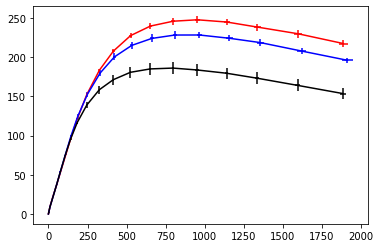

In [295]:
## Test Plot
plt.errorbar(RB_PARII, RB_ETRII, yerr=RB_ETRII_STDEV, xerr=RB_PARII_STDEV, c='r')
plt.errorbar(RGB_PARII, RGB_ETRII, yerr=RGB_ETRII_STDEV, xerr=RGB_PARII_STDEV, c='b')
plt.errorbar(WHITE_PARII, WHITE_ETRII, yerr=WHITE_ETRII_STDEV, xerr=WHITE_PARII_STDEV, c='k')

In [296]:
with open(DIR_OUTPUT + "LC_Averages.csv", "a", newline="") as f:
    writer = csv.writer(f)
    writer.writerow([LC_FOLDER_NAME,"WhitePARII_Av", "WhitePARII_StDev", 
                     "WhiteETRII_Av", "WhiteETRII_StDev", 
                    "RGBPARII_Av", "RGBPARII_StDev", 
                     "RGBETRII_Av", "RGBETRII_StDev", 
                    "RBPARII_Av", "RBPARII_StDev", 
                     "RBETRII_Av", "RBETRII_StDev"])
    for i in range(len(WHITE_PARII)):
        writer.writerow(["",WHITE_PARII[i], WHITE_PARII_STDEV[i], 
                         WHITE_ETRII[i], WHITE_ETRII_STDEV[i],
                        RGB_PARII[i], RGB_PARII_STDEV[i], 
                         RGB_ETRII[i], RGB_ETRII_STDEV[i],
                        RB_PARII[i], RB_PARII_STDEV[i], 
                         RB_ETRII[i], RB_ETRII_STDEV[i]])
f.close()